# Описание проекта

Я аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

# Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Описание данных

Данные для первой части

Файл /datasets/hypothesis.csv.

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv. 

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
sns.set()
pd.set_option('display.max_colwidth', 110)

Загрузим таблицу с гипотезами и изучим ее.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

Рассчитаем ICE SCORE для гипотез

In [4]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Самыми перспективными гипотезами по ICE стали гипотезы под нумерами  8, 0 и 7. 

Теперь рассчитаем RICE SCORE для этих же гипотез, аналогично отсортируем полученный результат в порядке убывания приоритета.

In [5]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis.sort_values(by = 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


По фреймворку RICE на первый план выходят гипотезы с большим охватом (Reach). Приоритетными остались 0 и 7 гипотезы, к ним добавилась гипотеза номер 2. Гипотеза номер 8 с самым высоким приоритетом по ICE (Запустить акцию, дающую скидку на товар в день рождения) опустилась в списке, так как у нее небольшой охват.

# Вывод
В целом, оба фреймворка (ICE и RICE) поставили в приоритет аналогичные гипотезы. Самыми переспективными оказались 0 и 7 гипотезы. ICE также выделил гипотезу номер 8 (запустить акцию, дающую скидку на товар в день рождения), как гипотезу с высоким уровнем уверенности и влияния (confidence и impact). В соответствии с RICE , самой перспективной является гипотеза номер 2 (добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), как обладающую высоким охватом.

## Анализ A/B-теста

### Расчет кумулятивных показателей и построение графиков 

Импортируем датафреймы и напишем функцию для автоматиpации вывода датафрейма и информации о нем.

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
def first_look (df):
    print ('---------------- Первые 5 строк --------------------')
    display (df.head())
    print(' ')
    print(' ')
    print ('---------------- Типы данных --------------------')
    print (df.info())
    print(' ')
    print(' ')
    print ('---------------- Пропуски --------------------')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count =+1
    if count == 0:
        print ('Пропусков НЕТ')
    print(' ')
    print(' ')
    print ('---------------- Дубликаты --------------------')
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print ('Дубликатов НЕТ')

In [8]:
first_look(orders)

---------------- Первые 5 строк --------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


 
 
---------------- Типы данных --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
 
 
---------------- Пропуски --------------------
Пропусков НЕТ
 
 
---------------- Дубликаты --------------------
Дубликатов НЕТ


Пропусков нет, названия столбцов корректны, стоит только изменить тип данных в столбце с датами.

In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Теперь рассмотрим таблицу visitors.

In [10]:
first_look(visitors)

---------------- Первые 5 строк --------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


 
 
---------------- Типы данных --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
 
 
---------------- Пропуски --------------------
Пропусков НЕТ
 
 
---------------- Дубликаты --------------------
Дубликатов НЕТ


Изменим тип данных с датами покупок на дату.

In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим общее количество пользователей в каждой группе:

In [12]:
print (visitors.groupby('group')['visitors'].sum())

group
A    18736
B    18916
Name: visitors, dtype: int64


Группы очень близки по размеру, что хорошо для проводимого теста. Но мы проверим, встречаются ли такие посетители, которые попали в две группы теста одновременно. Для этого построим сводную таблицу.

In [13]:
orders_pivot = orders.pivot_table(index = 'visitorId', columns = 'group', values = 'transactionId', aggfunc = 'first')
orders_pivot

group,A,B
visitorId,,
5114589,NaN,9.000260e+08
6958315,NaN,1.887337e+09
8300375,4.293856e+09,3.679129e+09
11685486,7.972722e+08,NaN
39475350,NaN,4.378764e+08
...,...,...
4266935830,1.811671e+09,1.216534e+09
4278982564,5.144316e+07,NaN
4279090005,NaN,2.724331e+09


Мы видим, что пользователи, которые попали и в группу А и в группу В, встречаются. Выведем список ID таких посетителей.

In [14]:
orders_pivot1 = orders_pivot.loc[orders_pivot['A'].notnull()]

In [15]:
orders_pivot2 = orders_pivot1.loc[orders_pivot1['B'].notnull()].reset_index()

In [16]:
orders_pivot2

group,visitorId,A,B
0,8300375,4.293856e+09,3.679129e+09
1,199603092,2.223240e+09,4.376570e+08
2,232979603,8.356615e+07,2.670069e+09
3,237748145,2.594268e+09,1.630051e+09
4,276558944,3.894438e+09,1.701654e+09
5,351125977,3.075639e+09,4.252514e+09
6,393266494,3.031565e+09,9.369174e+08
7,457167155,2.370269e+09,2.526330e+08
8,471551937,3.734714e+09,2.676541e+09
9,477780734,3.335804e+09,1.325619e+08


Для чистоты эксперимента удалим заказы, которые совершили пользователи, попавшие в две группы 

In [17]:
orders = orders[~orders['visitorId'].isin(orders_pivot2['visitorId'].unique())]

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [19]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Соберём агрегированные кумулятивные по дням данные о заказах. Вычислим максимальную дату, найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:

In [20]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [21]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


Объединим обе таблицы в одной 

In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708,0.028801
58,2019-08-30,A,460,437,3311413,18037,0.025503
59,2019-08-30,B,531,511,4955833,18198,0.029179
60,2019-08-31,A,468,445,3364656,18736,0.024979


Получим выборки с разбивкой по группам:

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

display(cumulativeRevenueA.head())
display(cumulativeRevenueB.head())

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


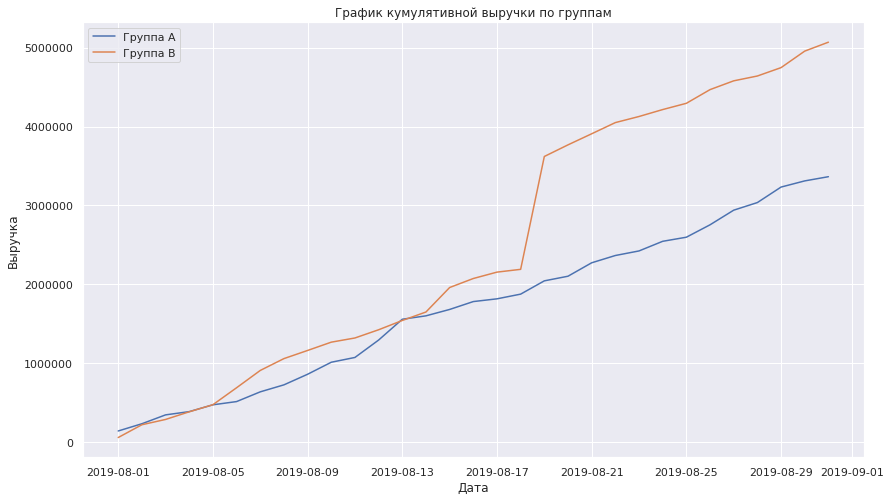

In [24]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = cumulativeRevenueA, x = "date", y = "revenue", label = 'Группа А')
sns.lineplot(data = cumulativeRevenueB, x = "date", y = "revenue", label = 'Группа B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.legend()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.show()

Выручка достаточно равномерно увеличивается в течение всего теста. На графике видим резкий рост выручки группы В в одной точке. Скорее всего это говорит о появлении очень дорогих заказов в выборке. 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

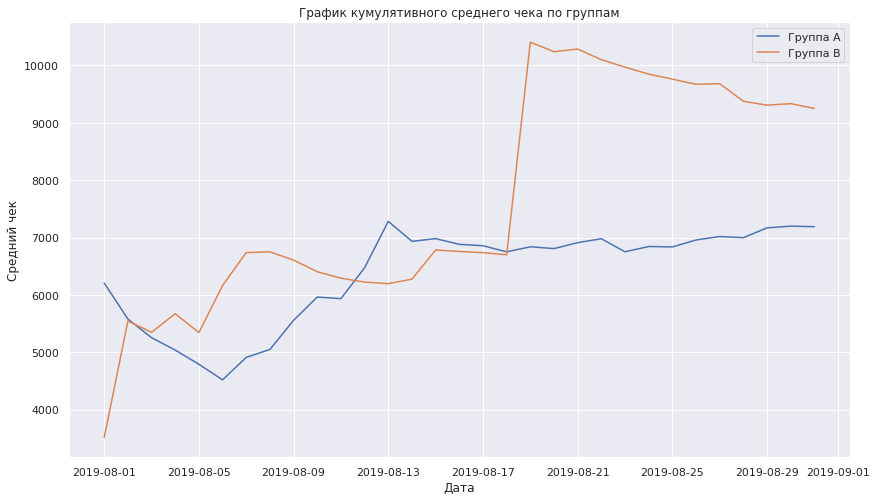

In [25]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = cumulativeRevenueA, x = 'date', y = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
            label = 'Группа А')
sns.lineplot(data = cumulativeRevenueB, x = 'date', y = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
            label = 'Группа В')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show();

Опять же видим резкий подъем на графике группы В, нужно рассмотреть покупки группы В на предмет аномальных значений. В остальном же средний чек различается несильно, покупатели в среднем платят одинаково.

Построим график относительного различия для среднего чека.

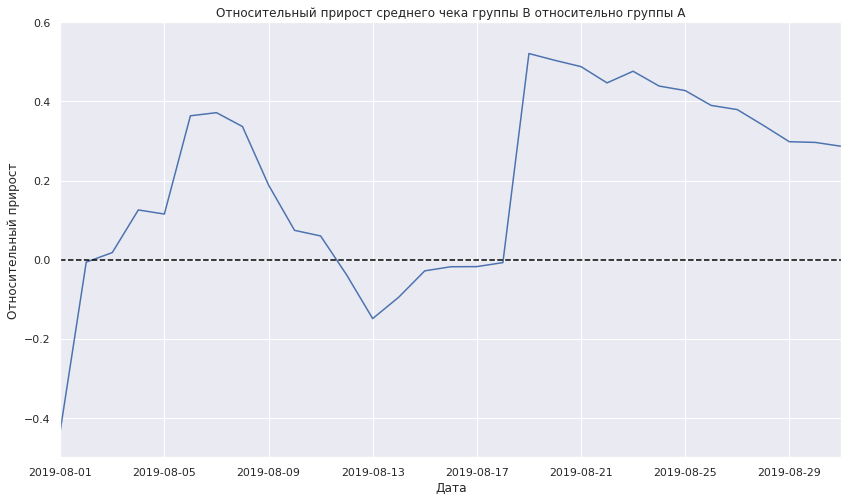

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])
fig = plt.figure(figsize = (14, 8))
sns.lineplot(x = mergedCumulativeRevenue['date'], 
             y = (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
             (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.ylabel('Относительный прирост')
plt.title('Относительный прирост среднего чека группы B относительно группы A')
plt.axhline(y = 0, color = 'black', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.6]);

В нескольких точках график различия между группам резко скачет. В середине исследуемого периода резкий провал, хотя до этого заметен довольно значительный прирост группы В относительно группы А.

Далее проанализируем график кумулятивной конверсии. Получим таблицы с кумулятивными показателями по группам А и В.

In [27]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
display(cumulativeDataA.head())
display(cumulativeDataB.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
2,2019-08-02,A,42,36,234381,1338,0.031390
4,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,A,99,92,474413,3318,0.029837


,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,59758,713,0.023843
3,2019-08-02,B,40,39,221801,1294,0.030912
5,2019-08-03,B,54,53,288850,1803,0.029950
7,2019-08-04,B,68,66,385740,2573,0.026428
9,2019-08-05,B,89,87,475648,3280,0.027134


Объединим полученные таблицы

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


Проанализируем график кумулятивной конверсии.

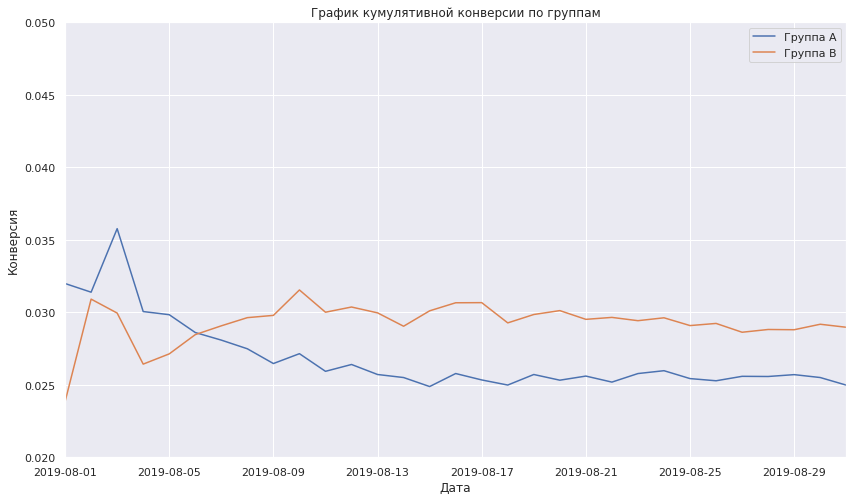

In [29]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = mergedCumulativeConversions, x = 'date', y = 'conversionA', label = 'Группа А')
sns.lineplot(data = mergedCumulativeConversions, x = 'date', y = 'conversionB', label = 'Группа B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.05])
plt.legend();

График достаточно симметричен. Через некотрое время после старта теста конверсия группы B вырвалась вперед и зафиксировалась на стабильном значении.

Построим график относительного различия кумулятивных конверсий:

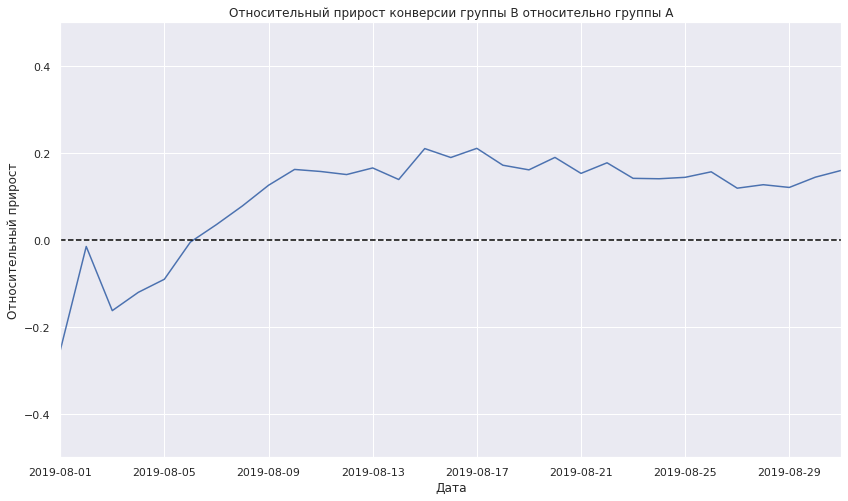

In [30]:
fig = plt.figure(figsize = (14, 8))
sns.lineplot(data = mergedCumulativeConversions, 
             x = 'date', 
             y = mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.xlabel('Дата')
plt.ylabel('Относительный прирост')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y = 0, color = 'black', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.5, 0.5]);

После слабого старта конверсия группы В вырвалась вперед и оставалась стабильно выше конверсии группы А, хотя прирост со временем замедлился.

### Анализ выбросов

Построим точечный график кол-ва заказов по пользователям.

In [31]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg(
    {'transactionId' : pd.Series.nunique}).sort_values(by = 'transactionId', ascending = False)
ordersByUsers.columns = ['userId','orders']
ordersByUsers

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


Оценим число заказов при помощи диаграммы рассеяния:

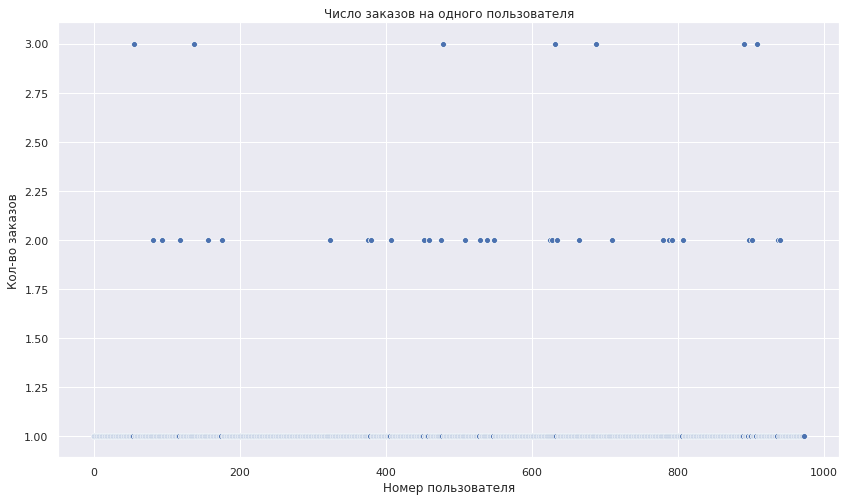

In [32]:
x_values = pd.Series(range(0,len(ordersByUsers)))
fig = plt.figure(figsize = (14, 8))
sns.scatterplot(data = ordersByUsers, x = x_values, y = 'orders')
plt.xlabel('Номер пользователя')
plt.ylabel('Кол-во заказов')
plt.title('Число заказов на одного пользователя');

Есть некоторое количество пользователей с большим количеством заказов (более 2). Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Будем считать выбросами пользователей с более чем двумя заказами.

Аналогично оценим стоимость заказов:

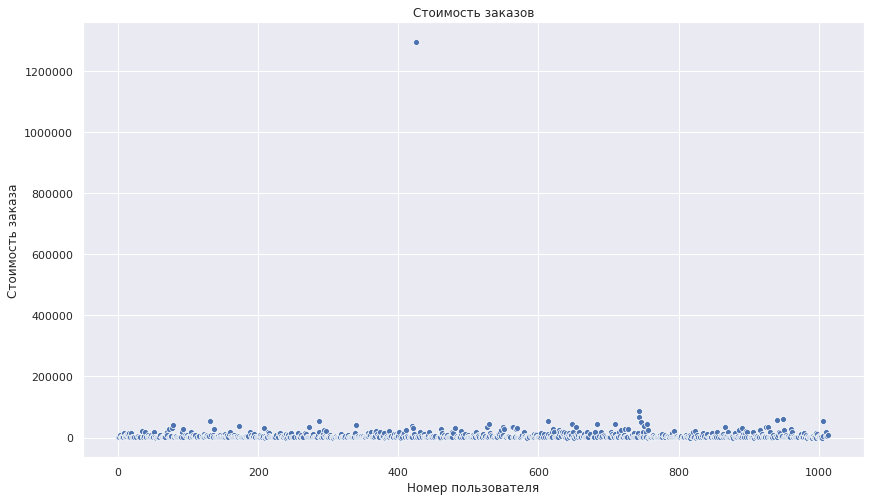

In [34]:
x_values = pd.Series(range(0,len(orders)))
fig = plt.figure(figsize = (14, 8))
sns.scatterplot(data = orders, x = x_values, y = 'revenue')
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказов');

Наблюдаем явный выброс - заказ со стоимостью более 1200000, рассмотрим детальнее разброс заказов со стоимостью менее 200000:

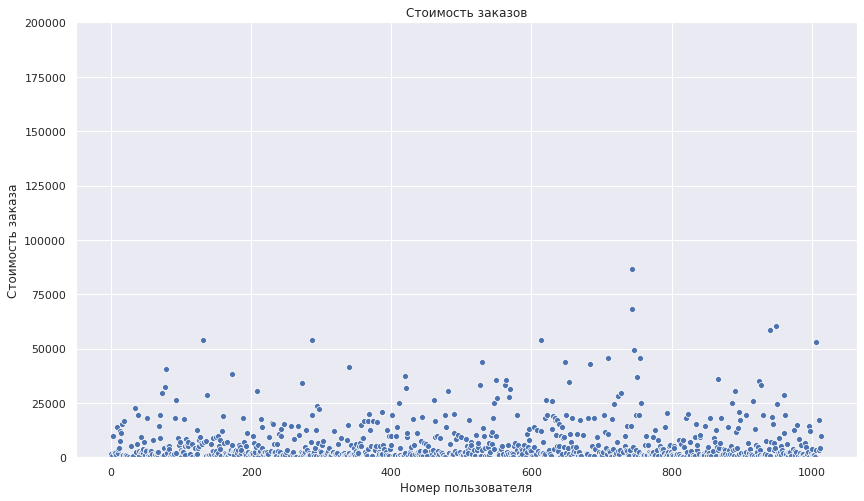

In [35]:
x_values = pd.Series(range(0,len(orders)))
fig = plt.figure(figsize = (14, 8))
sns.scatterplot(data = orders, x = x_values, y = 'revenue')
plt.ylim(0, 200000)
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказов');

Cтоимость большинства заказов явно не превышают 25 тысяч. Рассчитаем 95 и 99 перцентили:

In [36]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


 Не более 5% заказов обладали стоимостью более 26785. Примем за выбросы заказы стоимостью выше 27000.

### Статистический анализ

Подготовим данные для статистических исследований нашего теста. Разобьем пользователей по группам и дням посещения и создадим таблицу с кумулятивными данными.

In [37]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis = 1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
display(visitorsACummulative.head(), visitorsBCummulative.head())

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Так же подготовим таблицы по заказам. Получим таблицы с ежедневным количеством заказов по группам и накопительным количеством заказов по дням.

In [38]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
display(ordersACummulative.head(), ordersBCummulative.head())

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объединим все полученные таблицы

In [39]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on = 'date', how = 'left')\
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Получим выборки по каждой группе с ID покупателя и количеством его заказов. Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Применим критерий Манна-Уитни для проверки гипотезы о равенстве конверсий по группам и отформатируем p-value, округлив его до трёх знаков после запятой.
Примем за нулевую гипотезу
Н0: Конверсия группы В не отличается от конверсии группы А, соответственно, альтернативная гипотеза
Н1: Конверсия группы А и группы В различна

In [40]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)



Проведем тест Манна-Уитни

In [41]:
print('{0:.3f} - p-value'
      .format(st.mannwhitneyu(sampleA, sampleB)[1], alternative = 'two-sided'))

print('{0:.3f} - относительный прирост конверсии группы B'.format(sampleB.mean()/sampleA.mean()-1))

0.006 - p-value
0.160 - относительный прирост конверсии группы B


P-value чуть выше общепринятого уровня статистический значимости (0.05), поэтому мы не можем отвергнуть гипотезу о том, что между конверсиями групп А и В нет статистически значимых различий.

Теперь найдём относительные различия в среднем чеке между группами.
Примем за нулевую гипотезу
Н0: Средний чек группы В не отличается от среднего чека группы А, соответственно, альтернативная гипотеза
Н1: Средний чек группы А и группы В различен.

In [42]:
print('{0:.3f} - p-value'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                       orders[orders['group']=='B']['revenue'])[1],alternative = 'two-sided'))
print('{0:.3f} - относительный прирост среднего чека группы B'.format(orders[orders['group']=='B']['revenue']
                       .mean() / orders[orders['group']=='A']['revenue'].mean()-1))

0.415 - p-value
0.287 - относительный прирост среднего чека группы B


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом заметим, что средний чек группы В заметно больше среднего чека группы А.

Примем за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(pd.DataFrame(abnormalUsers.head(5)))
display(abnormalUsers.shape)

,visitorId
568,113298937
1099,148427295
928,204675465
33,249864742
684,358944393


(58,)

Подготовим отфильтрованные выборки количества заказов по пользователям по группам теста:

In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index = np.arange(data['visitorsPerDateA']
                                                          .sum() - len(ordersByUsersA['orders'])), name = 'orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index = np.arange(data['visitorsPerDateB']
                                                          .sum() - len(ordersByUsersB['orders'])), name = 'orders')],axis=0) 
display(sampleAFiltered.head(), sampleBFiltered.head())

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Применим статистический критерий Манна-Уитни к полученным выборкам.
Примем за нулевую гипотезу
Н0: Конверсия группы В не отличается от конверсии группы А, соответственно, альтернативная гипотеза:
Н1: Конверсия группы А и группы В различна.

In [45]:
print('{0:.3f} - p-value'
      .format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],alternative = 'two-sided'))

print('{0:.3f} - относительный прирост конверсии группы B'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.006 - p-value
0.182 - относительный прирост конверсии группы B


Результаты по конверсии изменились несильно. Достаточно заметно увеличился лишь прирост конверсии группы B.

Проверим изменения в среднем чеке, сначала построим график по отфильтрованной информации

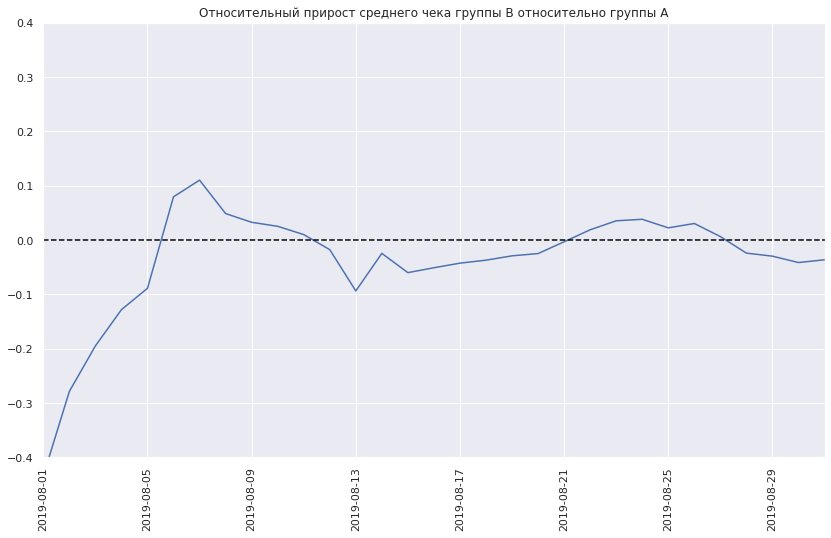

In [46]:
orders_f = orders[orders['revenue'] < 30000]
datesGroups_f = orders_f[['date','group']].drop_duplicates()

ordersAggregated_f = datesGroups_f.apply(
lambda x: orders_f[np.logical_and(orders_f['date'] <= x['date'], orders_f['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated_f.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

cumulativeRevenueA_f = ordersAggregated_f[ordersAggregated_f['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_f = ordersAggregated_f[ordersAggregated_f['group']=='B'][['date','revenue', 'orders']]
mergedCumulativeRevenue_f = cumulativeRevenueA_f.merge(cumulativeRevenueB_f, 
                                                   left_on = 'date', 
                                                   right_on = 'date', 
                                                   how = 'left', 
                                                   suffixes = ['A', 'B'])


fig = plt.figure(figsize = (14, 8))
sns.lineplot(x = mergedCumulativeRevenue_f['date'], 
             y = (mergedCumulativeRevenue_f['revenueB'] / mergedCumulativeRevenue_f['ordersB']) /
             (mergedCumulativeRevenue_f['revenueA'] / mergedCumulativeRevenue_f['ordersA'])-1)
plt.xlabel('')
plt.ylabel('')
plt.title('Относительный прирост среднего чека группы B относительно группы A')
plt.xticks(rotation = 90)
plt.axhline(y = 0, color = 'black', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.4, 0.4]);

Как видно, после удаления выбросов колебания графика уменьшились, со временем относительный прирост стал практически нулевым.

Проведем тест Манна-Уитни и рассчитаем относительный прирост среднего чека группы В.
Примем за нулевую гипотезу
Н0: Средний чек группы В не отличается от среднего чека группы А, соответственно, альтернативная гипотеза:
Н1: Средний чек группы А и группы В различен.

In [47]:
print('{0:.3f} - p-value'.format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
    orders[np.logical_and(
        orders['group'] == 'B', #заказы пользователей группы B
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1],alternative = 'two-sided')) 

print('{0:.3f} - относительный прирост среднего чека группы B'.format(
    orders[np.logical_and(orders['group'] == 'B', 
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
    orders[np.logical_and(orders['group'] == 'A', 
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.323 - p-value
-0.048 - относительный прирост среднего чека группы B


P-value остался большим, у нас нет оснований опровернуть гипотезу о равенстве среднего чека между группами А и В.
А вот относительный прирост сильно уменьшился и стал отрицательным, правда, близким к нулю. Это стало результатом удаления аномальных значений суммы покупок (таких как 1200000).

Теперь можно сделать следующие выводы:

- Нет статистически значимого различия по конверсии между группами и по «сырым», и по очищенным от аномалий данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по  очищенным от аномалий данным;
- График различия конверсии между группами сообщает, что результаты группы B лучше результатов группы A и есть достаточно значимая тенденции к улучшению
- График различия среднего чека колеблется. После удаления выбросов можно сделать из этого графика вывод о малом различии средних чеков по группам А и В

# Вывод
По результатам теста можно принять решение остановить тест, зафиксировав победу группы В и признать предложенные изменения успешными. Хотя средний чек остался на неизменном уровне, конверсия достаточно сильно увеличилась (на 15-20% от начальных значений). Это должно позволить увеличить выручку, что и было целью нововведений, предложенных для тестирования.
Продолжать тест смысла нет: группа B статистически значимо лучше группы A по значению конверсии, график конверсии говорит о фиксации результата.

## Общие выводы.

1. В первой части проекта мной была проведена приоритизация различных гипотез в соответствии с фреймворками ICE и RICE. По двум фреймворкам самыми приоритетными оказались следующие гипотезы: 
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

ICE также выделил гипотезу запустить акцию, дающую скидку на товар в день рождения, как гипотезу с высоким уровнем уверенности и влияния (confidence и impact). В соответствии с RICE , самой перспективной является гипотеза добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, как обладающую высоким охватом.

2. Во второй части проекта мною был проведен анализ А/B теста. Сперва были удалены заказы, которые совершили пользователи, попавшие сразу в две группы (А и В). Затем были расчитаны кумулятивные показатели выручки, среднего чека, конверсии, изменения кумулятивных показателей группы B относительно А, построены графики. Были расчитаны 95 и 99 перцентили количества заказов на пользователя и стоимости заказов. Были обнаружены выбросы, которые учитывались при дальнейшем статистическом анализе.
При статистическом исследовании нашего теста был применен критерий Манна-Уитни. По результатам исследования были получены следующие выводы:
- Нет статистически значимого различия по конверсии между группами и по «сырым», и по очищенным от аномалий данным;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по очищенным от аномалий данным;

По результатам теста можно принять решение остановить тест, зафиксировав победу группы В и признать предложенные изменения успешными. Хотя средний чек остался на неизменном уровне, конверсия достаточно сильно увеличилась (на 15-20% от начальных значений). Это должно позволить увеличить выручку, что и было целью нововведений, предложенных для тестирования.
Продолжать тест смысла нет: группа B статистически значимо лучше группы A по значению конверсии, график конверсии говорит о фиксации результата.


<div style="border:solid green 2px; padding: 20px">
<b>Комментарии ревьюера</b>

Артур, в проекте выполнена основная часть работы, ты молодец!
    
С расчетами проблем не возникло, это отлично. Но для аналитика также важно, как он визуализирует полученные результаты для представления их коллегам или руководству, как он формулирует и гипотезы и как их проверяет, как делает выводы. Поэтому проект еще нужно доработать:
- поискать нет ли в данных пользователей, которые попали в обе группы теста одновременно;
- поработать с визуализацией и оформлением работы;
- задать параметр alternative при вызове критерия Манна-Уитни в соответствии с формулировками гипотез, которые мы проверяем;
- подготовить общий вывод по работе.
    
Так что жду твою работу на повторное ревью :)

<div style="border:solid green 2px; padding: 20px">
<b>Комментарии ревьюера v2</b>

Артур, работа выполнена на хорошем уровне, так держать!

Ты молодец, что сопровождаешь все вычисления своими комментариями и пояснениями, сразу видно, что и зачем ты делаешь. 

Хотела отметить, что ты очень грамотно используешь методы pandas для работы с датафреймами, с проверкой и исследованием данных тоже все окей.

У тебя хорошо получается анализировать, развивайся в этом направлении. Для аналитика важно, какие выводы и заключения он делает по проведённым расчетам и тестам.

В этой работе у нас несколько проверок гипотез, так что можно было обернуть коды в функцию. Написание и использование функций очень удобно - с ними кода меньше, проверять работу легче, функции удобно тестировать. Этот навык точно пригодится тебе в следующих спринтах :)

По поводу графиков - после доработки все отлично, молодец! Могу еще посоветовать посмотреть библиотеку seaborn, там есть достаточно интересные варианты визуализации :) Вот этот ресурс https://python-graph-gallery.com, там много готовых решений. 

Успехов в выполнении следующих заданий!